## **Проект**
# **Анализ данных о полетах в космос**
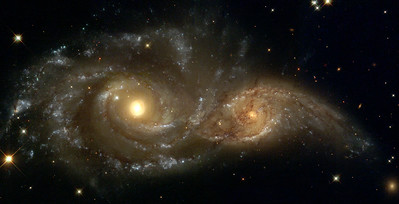

# Нахождение статистик и создание рейтингов

## 1. Cumulative endurance records

### считывание данных

In [ ]:
endure_record = {} #словарь рекордсменов по продолжительности полетов
duration = [] #продолжительность полетов (в часах)
with open('US RUSSIAN ENDURANCE RECORDS.csv', 'r', encoding = 'utf-8') as records:
  for line in records:
    line = line.strip().split(';')
    name = line[1]
    info = list(map(int, line[-1].split('/')))
    days = info[0]
    flights = info[-1]
    #переводим продолжительность полета в нужную единицу измерения (из суток в часы)
    duration.append(days*24)
    #заполняем словарь рекордсменов
    if name not in endure_record:
        endure_record[name] = info

### средняя продолжительность полетов среди рекордсменов (в часах)

In [ ]:
average_duration = round(sum(duration)/len(duration), 2)
print(f'average flight duration: {average_duration} hours')

average flight duration: 11515.71 hours


### медиана продолжительности полетов

In [ ]:
med_duration = sorted(duration)[len(duration) // 2]
print(f'medium flight duration: {med_duration} hours')

medium flight duration: 9408 hours


### максимальное и минимальное значения длительности полетов


In [ ]:
maxi = max(endure_record.values())
mini = min(endure_record.values())
print(f'maximum duration: {maxi[0]} days ({maxi[0]*24} hours) in {maxi[1]} flights')
print(f'minimum duration: {mini[0]} days ({mini[0]*24} hours) in {mini[1]} flights')

maximum duration: 803 days (19272 hours) in 6 flights
minimum duration: 362 days (8688 hours) in 3 flights


### поиск космонавта-рекордсмена по выносливости

In [ ]:
#выводим имя рекордсмена, длительность его нахождения в космосе и число полетов
for k,v in endure_record.items():
  if v == maxi:
    print(f'{k} set a record: spent a total of {v[0]*24} hours in space during {v[-1]} flights!')

Sergei Krikalev set a record: spent a total of 19272 hours in space during 6 flights!


## 2. Astronauts & 1st country rating


### считывание данных

In [ ]:
rate_astro = {} #словарь для рейтинга стран по количеству астронавтов
all_astro = 0 #общее число астронавтов
astro_genders = {} #словарь для подсчета мужчин и женщин-космонавтов
num_flights = {} #словарь для рейтинга стран по количеству полетов
all_flights = [] #список для подсчета общего количества полетов в космос
with open('TABLE OF VETERAN SPACE FLIERS.csv', 'r', encoding = 'utf-8') as fliers:
  for line in fliers:
    line = line.strip().split(';')[:3] #берем только первые три показателя, тк остальные данные - о миссиях
    name = line[0]
    flights = list(map(int, line[1]))
    gender, nation = list(line[2].split('-'))

    #считаем количество космонавтов
    all_astro += 1

    #заполняем словарь общего количества мужчин и женщин-космонавтов
    if gender == 'M':
      gender = "men"
    else:
      gender = "women"

    if gender not in astro_genders:
      astro_genders[gender] = 0
    astro_genders[gender] += 1

    #заполняем словарь-рейтинг стран по количеству астронавтов & заполняем словарь для рейтинга стран по суммарному количеству полетов
    if nation not in rate_astro:
      rate_astro[nation], num_flights[nation] = 0, 0
    rate_astro[nation] += 1
    num_flights[nation] += sum(flights)

    #считаем общее количество полетов в космос
    all_flights.append(sum(flights))

### общее число космонавтов, количество мужчин и женщин, их процентное соотношение

In [ ]:
print(f'total number of astronauts: {all_astro}')
for k,v in astro_genders.items():
  #считаем процентное соотношение мужчин и женщин среди космонавтов
  gender_percent = round((int(v)/all_astro)*100, 2)
  print(f'{k}: {v} => {gender_percent}%')

total number of astronauts: 531
men: 475 => 89.45%
women: 56 => 10.55%


### рейтинг стран по количеству астронавтов (топ5) и процентные доли стран от общего числа космонавтов

In [ ]:
with open('country ranking by number of astronauts.csv', 'w', encoding = 'utf-8') as ranking_asto:
  for k,v in sorted(rate_astro.items(), key = lambda x: x[1], reverse = True):
    print(f'{k}; {v}', file = ranking_asto)

print(f'top five country ranking by number of astronauts')
rating = 1
with open('country ranking by number of astronauts.csv', 'r', encoding = 'utf-8') as ranking_asto:
  for line in ranking_asto:
    line = line.strip().split(':')
    #считаем, сколько процентов от общего числа космонавтов занимают космонавты конкретной страны
    astro_percent = round((int(line[-1])/all_astro)*100, 2)
    print(f'{rating}) {line[0]}: {line[1]} astonauts => {astro_percent}%')
    rating += 1
    if rating == 6:
      break

top five country ranking by number of astronauts
1) US:  336 astonauts => 63.28%
2) USSR:  72 astonauts => 13.56%
3) Russia:  42 astonauts => 7.91%
4) Japan:  9 astonauts => 1.69%
5) France:  9 astonauts => 1.69%


## 3. Space flights & 2nd country rating

###суммарное количество полетов всех космонавтов

In [ ]:
print(f'total number of space flights: {sum(all_flights)}')

total number of space flights: 1196


### рейтинг стран по количеству полетов

In [ ]:
with open('country ranking by number of flights.csv', 'w', encoding = 'utf-8') as ranking_flights:
  for k,v in sorted(num_flights.items(), key = lambda x: x[1], reverse = True):
    print(f'{k}; {v}', file = ranking_flights)

print(f'top five country ranking by number of flights')
rating = 1
for k,v in sorted(num_flights.items(), key = lambda x: x[1], reverse = True)[:5]:
  #считаем, сколько процентов от общего числа полетов были совершены космонавтами конкретной страны
  flight_percent = round((int(v)/sum(all_flights))*100, 2)
  print(f'{rating}) {k}: {v} flights => {flight_percent}%')
  rating += 1

top five country ranking by number of flights
1) US: 836 flights => 69.9%
2) USSR: 157 flights => 13.13%
3) Russia: 81 flights => 6.77%
4) France: 17 flights => 1.42%
5) Canada: 17 flights => 1.42%


##4. Space program fatalities

### считываем данные, заполняем нужную информацию

In [ ]:
#список с названиями месяцев
all_months = [
    'january', 'february', 'march', 'april', 'may',
    'june', 'july', 'august', 'september',
    'october', 'november', 'december'
    ]
participants = {} #словарь пострадавших космонавтов
with open('SPACE PROGRAM FATALITIES.csv', 'r', encoding = 'utf-8') as fatality:
  for line in fatality:
    name, date, problem = line.strip().split(';')
    month, day, year = date.split('/')
#преобразовываем месяц из числового формата в буквенный
    if month[0] == '0':
        month = month[1]
    month = all_months[int(month) - 1]

#преобразовываем год из двузначной записи в четырехзначную
    if year[0] == '0' or year[0] == '1':
      year = '20' + year
    else:
      year = '19' + year

#записываем итоговый формат даты
    current_date = day + ' ' + month + ' ' + year
    info = problem, current_date

#заполняем словарь с погибшими космонавтами
    if info not in participants:
      participants[info] = 1
    else:
      participants[info] += 1


### рейтинг миссий по наибольшему количеству жертв

In [ ]:
#записываем рейтинг в новый файл
with open('number of casualties.csv', 'w', encoding = 'utf-8') as casualty:
  for k,v in sorted(participants.items(), key = lambda x: x[1], reverse = True):
    print(f'{k[1]}; {v}; {k[0]}', file = casualty)

#выводим данные о погибших из файла и печатаем 5 провалившихся миссий, забравших больше всего жизней космонавтов
num = 1
print('space program fatalities')
for k, v in sorted(participants.items(), key = lambda x: x[1], reverse = True)[:5]:
  print(f'{num}) mission failure date: {k[1]}; number of casualties: {v}; reason:{k[0]}')
  num += 1

space program fatalities
1) mission failure date: 28 january 1986; number of casualties: 7; reason: SRB booster failure, mission STS-51L
2) mission failure date: 01 february 2003; number of casualties: 7; reason: Re-entry breakup, WLE penetration
3) mission failure date: 29 june 1971; number of casualties: 3; reason: Soyuz 11 depressurized during entry
4) mission failure date: 27 january 1967; number of casualties: 3; reason: Apollo 1 launch pad fire
5) mission failure date: 28 february 1966; number of casualties: 2; reason: T-38 jet crash in St.Louis
